In [1]:
import numpy as np
import matplotlib.pyplot as plt

### load dataset

In [2]:
# import requests

# url = "https://www.kaggle.com/api/v1/datasets/download/hojjatk/mnist-dataset"

# output_path = "mnist-dataset.zip"


# response = requests.get(url, stream=True)

# if response.status_code == 200:  
#     with open(output_path, 'wb') as f:
#         for chunk in response.iter_content(chunk_size=1024):
#             if chunk:  
#                 f.write(chunk)
#     print(f"File berhasil diunduh dan disimpan sebagai {output_path}")
# else:
#     print(f"Failed to download file. Status code: {response.status_code}")


In [3]:
# !unzip mnist-dataset.zip

In [8]:
import numpy as np
import gzip

def load_mnist_images(file_path):
    # Membaca file gambar
    with open(file_path, 'rb') as f:
        f.read(16)  # Melewati header 16 byte
        data = np.frombuffer(f.read(), dtype=np.uint8)  # Membaca seluruh data
        images = data.reshape(-1, 28 * 28) / 255.0  # Normalisasi ke rentang [0, 1]
    return images

def load_mnist_labels(file_path):
    # Membaca file label
    with open(file_path, 'rb') as f:
        f.read(8)  # Melewati header 8 byte
        labels = np.frombuffer(f.read(), dtype=np.uint8)  # Membaca seluruh data label
    return labels


train_images_path = '../data/train-images.idx3-ubyte'
train_labels_path = '../data/train-labels.idx1-ubyte'
test_images_path = '../data/t10k-images.idx3-ubyte'
test_labels_path = '../data/t10k-labels.idx1-ubyte'


train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)

# Memeriksa ukuran dataset
print("Training data shape:", train_images.shape)  # Harusnya (60000, 784)
print("Training labels shape:", train_labels.shape)  # Harusnya (60000,)
print("Test data shape:", test_images.shape)  # Harusnya (10000, 784)
print("Test labels shape:", test_labels.shape)  # Harusnya (10000,)


Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)


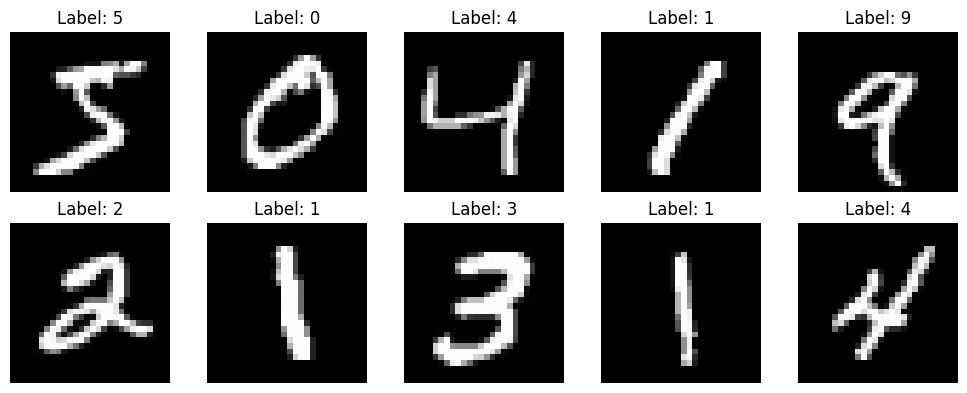

In [9]:


def plot_mnist_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 4))
    
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')  
    
    plt.tight_layout()
    plt.show()


plot_mnist_images(train_images, train_labels, num_images=10)


In [55]:

np.random.seed(42)

# Membuat array indeks acak
indices = np.random.permutation(train_images.shape[0])  # Mengacak indeks
test_size = int(0.2 * len(indices))  # Menentukan ukuran set pengujian
train_size = len(indices) - test_size  # Ukuran set pelatihan

# Memisahkan indeks untuk set pelatihan dan pengujian
test_indices = indices[:test_size]
train_indices = indices[test_size:]

# Membagi dataset berdasarkan indeks
X_train = train_images[train_indices]
y_train = train_labels[train_indices]
X_test = train_images[test_indices]
y_test = train_labels[test_indices]

# Memeriksa ukuran dataset
print("Training data shape:", X_train.shape)  # Harusnya (48000, 784)
print("Training labels shape:", y_train.shape)  # Harusnya (48000,)
print("Test data shape:", X_test.shape)  # Harusnya (12000, 784)
print("Test labels shape:", y_test.shape)  # Harusnya (12000,)


Training data shape: (48000, 784)
Training labels shape: (48000,)
Test data shape: (12000, 784)
Test labels shape: (12000,)


In [66]:
def to_tensor(data):
    return np.array(data)  


tensor_X_train = to_tensor(X_train)
tensor_y_train = to_tensor(y_train)
tensor_X_test = to_tensor(X_test)
tensor_y_test = to_tensor(y_test)

# # Memeriksa bentuk tensor
# print("Tensor Training data shape:", tensor_X_train.shape)  # Harusnya (48000, 784)
# print("Tensor Training labels shape:", tensor_y_train.shape)  # Harusnya (48000,)
# print("Tensor Test data shape:", tensor_X_test.shape)  # Harusnya (12000, 784)
# print("Tensor Test labels shape:", tensor_y_test.shape)  # Harusnya (12000,)

Tensor Training data shape: (48000, 784)
Tensor Training labels shape: (48000,)
Tensor Test data shape: (12000, 784)
Tensor Test labels shape: (12000,)


In [58]:
class Dense:
    def __init__(self, input_size, output_size, activation):
        self.input_size = input_size
        self.output_size = output_size
        self.activation = activation
        self.W = np.random.randn(input_size, output_size) * 0.01  # Bobot
        self.b = np.zeros((1, output_size))  # Bias
        self.last_input = None  # Untuk menyimpan input terakhir
        self.last_output = None  # Untuk menyimpan output terakhir

    def forward(self, A_in):
        self.last_input = A_in  # Simpan input terakhir
        Z = np.dot(A_in, self.W) + self.b  # Z = W * A_in + b
        self.last_output = self.activation(Z)  # Simpan output terakhir
        return self.last_output  # Menggunakan fungsi aktivasi

In [59]:
def relu(x):
    return np.maximum(0, x)

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Untuk stabilitas numerik
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [60]:
def sparse_categorical_crossentropy(y_true, y_pred):
    # y_true adalah label yang benar (scalar), y_pred adalah output dari model
    return -np.log(y_pred[0, int(y_true)])


In [61]:
class NeuralNetwork:
    def __init__(self):
        self.layers = [
            Dense(784, 128, relu),  # Lapisan pertama
            Dense(128, 64, relu),   # Lapisan kedua
            Dense(64, 10, softmax)   # Lapisan output
        ]

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, y_true, learning_rate):
        # Hitung gradien untuk output layer
        output_layer = self.layers[-1]
        dZ = output_layer.last_output.copy()
        dZ[0, int(y_true)] -= 1  # Hanya mengubah elemen yang sesuai dengan label
        dW = np.dot(output_layer.last_input.T, dZ)  # Gradien bobot
        output_layer.W -= learning_rate * dW  # Pembaruan bobot
        output_layer.b -= learning_rate * np.sum(dZ, axis=0, keepdims=True)  # Pembaruan bias

        # Hitung gradien untuk hidden layers
        for layer in reversed(self.layers[:-1]):
            dZ = np.dot(dZ, layer.W.T)  # Gradien untuk layer sebelumnya
            dZ[layer.last_input <= 0] = 0  # Derivatif dari ReLU
            dW = np.dot(layer.last_input.T, dZ)  # Gradien bobot
            layer.W -= learning_rate * dW  # Pembaruan bobot
            layer.b -= learning_rate * np.sum(dZ, axis=0, keepdims=True)  # Pembaruan bias

In [62]:
def train_model(model, train_images, train_labels, epochs=10, learning_rate=0.01):
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(train_images)):
            # Forward pass
            output = model.forward(train_images[i].reshape(1, -1))  
            # Hitung loss
            loss = sparse_categorical_crossentropy(train_labels[i], output)
            total_loss += loss
            
            # Perbarui bobot untuk setiap layer dengan backward pass
            model.backward(train_labels[i], learning_rate)

        # Tampilkan loss untuk setiap epoch
        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_images)}")

In [63]:
# Inisialisasi dan melatih model
model = NeuralNetwork()
train_model(model, X_train, y_train, epochs=10, learning_rate=0.01)

ValueError: shapes (1,10) and (64,128) not aligned: 10 (dim 1) != 64 (dim 0)

In [64]:
def evaluate_model(model, test_images, test_labels):
    correct_predictions = 0
    for i in range(len(test_images)):
        output = model.forward(test_images[i].reshape(1, -1))  # Mengubah bentuk input
        predicted_label = np.argmax(output)  # Mendapatkan label yang diprediksi
        if predicted_label == test_labels[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(test_images)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")



In [65]:
# Evaluasi model
evaluate_model(model, X_test, y_test)

Model Accuracy: 9.20%
